In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data
y = data.target


In [3]:
X.shape,y.shape

((150, 4), (150,))

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_tensor = torch.tensor(X_train_scaled,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.long)
y_test_tensor = torch.tensor(y_test,dtype=torch.long)

In [7]:
X_train_tensor.shape, X_test_tensor.shape,y_train_tensor.shape,y_test_tensor.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [8]:
class Iris(nn.Module):
    def __init__(self):
        super( Iris, self).__init__()
        self.layer1 =nn.Linear(4,12)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(12,24)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(24,20)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(20,3)
        self.softmax = nn.Softmax()
        
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.softmax(x)
        return x
        

In [9]:
model = Iris()

In [10]:
optimizer = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test accuracy :0.97, Test Loss : 0.62


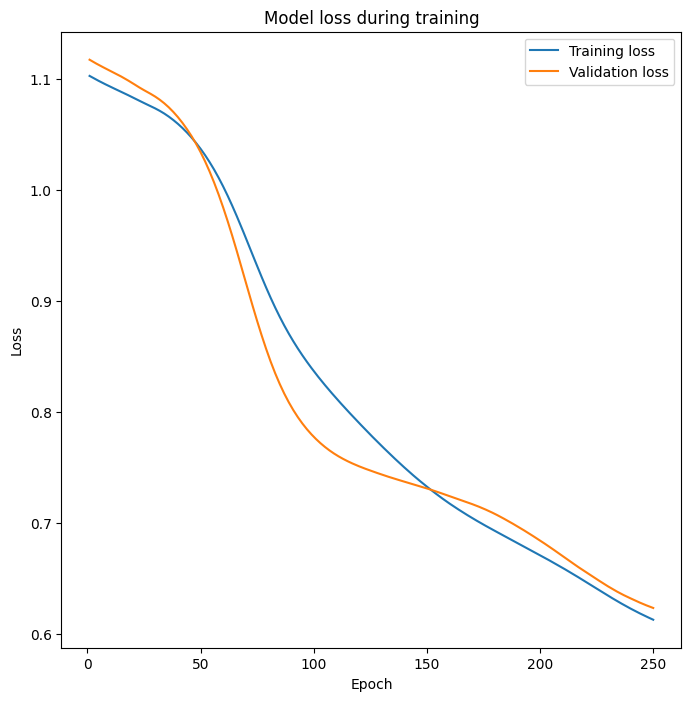

In [11]:
history = {'loss':[],'val_loss':[]}
num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs,y_train_tensor)
    loss.backward()
    optimizer.step()
    history['loss'].append(loss.item())

    
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_test_tensor)
        val_loss = criterion(outputs_val,y_test_tensor)
        history['val_loss'].append(val_loss.item())
        
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs,y_test_tensor).item()
    _,predicted = torch.max(outputs,1)
    test_accuracy = accuracy_score(y_test_tensor,predicted)
            
print(f"Test accuracy :{test_accuracy:.2f}, Test Loss : {test_loss:.2f}")
        
epochs = range(1,num_epochs+1)
train_loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8,8)) 
plt.plot(epochs, train_loss, label= 'Training loss')
plt.plot(epochs, val_loss, label= 'Validation loss')
plt.title('Model loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()